In [158]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [159]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [160]:
X_train = train.drop('label',axis=1)
y_train = train['label']

In [161]:
X_train.shape

(42000, 784)

In [162]:
X_train = X_train.astype("float32") / 255.0

In [163]:
NUMBER_CLASSES = 10
y_train = keras.utils.to_categorical(y_train, NUMBER_CLASSES)
y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [164]:
X_train = X_train.values.reshape(-1, 28, 28)
X_train.shape


(42000, 28, 28)

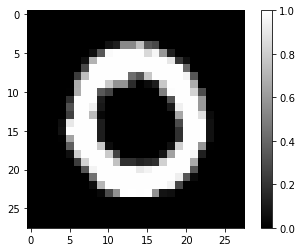

In [165]:
plt.figure()
plt.imshow(X_train[1], cmap='gray')
plt.colorbar()
plt.show()

In [121]:
model = keras.Sequential(
    [
        keras.layers.Conv2D(32, kernel_size=(3, 3),input_shape=(28, 28,1), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.8),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(NUMBER_CLASSES, activation="softmax"),
    ]
)

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [122]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 1600)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)               

In [137]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape


(42000, 28, 28, 1)

In [138]:
history = model.fit(X_train, y_train, batch_size=64, epochs=50, validation_split=0.1)

Epoch 1/50
591/591 [==============================] - 15s 25ms/step - loss: 0.0753 - accuracy: 0.9764 - val_loss: 0.0280 - val_accuracy: 0.9900
Epoch 2/50
591/591 [==============================] - 16s 26ms/step - loss: 0.0705 - accuracy: 0.9784 - val_loss: 0.0278 - val_accuracy: 0.9914
Epoch 3/50
591/591 [==============================] - 17s 29ms/step - loss: 0.0696 - accuracy: 0.9776 - val_loss: 0.0268 - val_accuracy: 0.9914
Epoch 4/50
591/591 [==============================] - 17s 29ms/step - loss: 0.0674 - accuracy: 0.9785 - val_loss: 0.0293 - val_accuracy: 0.9900
Epoch 5/50
591/591 [==============================] - 17s 29ms/step - loss: 0.0672 - accuracy: 0.9781 - val_loss: 0.0280 - val_accuracy: 0.9900
Epoch 6/50
591/591 [==============================] - 17s 29ms/step - loss: 0.0674 - accuracy: 0.9783 - val_loss: 0.0256 - val_accuracy: 0.9907
Epoch 7/50
591/591 [==============================] - 17s 29ms/step - loss: 0.0653 - accuracy: 0.9793 - val_loss: 0.0264 - val_accuracy:

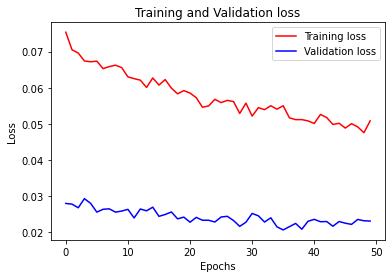

In [169]:
epochs = range(0,50)
plt.plot(epochs, history.history['loss'], 'r', label='Training loss')
plt.plot(epochs, history.history['val_loss'], 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

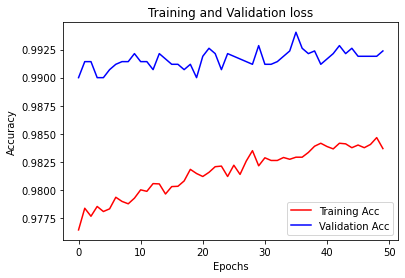

In [168]:
epochs = range(0,50)
plt.plot(epochs, history.history['accuracy'], 'r', label='Training Acc')
plt.plot(epochs, history.history['val_accuracy'], 'b', label='Validation Acc')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [171]:
test.shape

(28000, 784)

In [173]:
X_test = test.values.reshape(-1,28,28,1)
X_test.shape

(28000, 28, 28, 1)

In [174]:
X_test = X_test.astype("float32") / 255.0

In [175]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

2


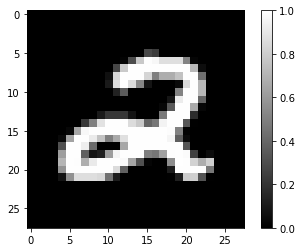

In [202]:
print(y_pred[27999])
X_test=X_test.reshape(-1,28,28)
plt.figure()
plt.imshow(X_test[27999], cmap='gray')
plt.colorbar()
plt.show()

In [197]:
pred_df = pd.DataFrame(y_pred)
pred_df

,0
0,2
1,0
2,9
3,9
4,3
...,...
27995,9
27996,7
27997,3
27998,9


In [198]:
pred_df.index += 1 
pred_df = pred_df.reset_index()
pred_df.columns = ["ImageId", "Label"]
pred_df

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [203]:
pred_df.to_csv("my_submission.csv", index=False)